In [3]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
x , y = make_moons(n_samples= 100 , noise  = 0.15)

In [5]:
x.shape , y.shape

((100, 2), (100,))

In [6]:
y[2]

np.int64(1)

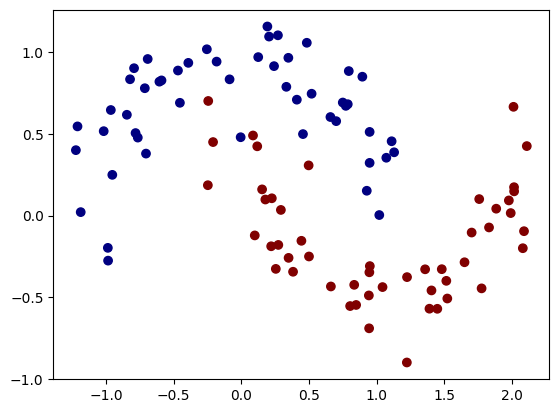

In [7]:
plt.scatter(x[: , 0] , x[: , 1] , c=y , cmap='jet')
plt.show()


In [8]:
polynomial_svm_clf = Pipeline([
    ("polynomial_features" , PolynomialFeatures(degree = 3)),
    ("Scaling" , StandardScaler()),
    ("svm_clf" , LinearSVC())
    
])

In [9]:
polynomial_svm_clf.fit(x , y)

,steps,"[('polynomial_features', ...), ('Scaling', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,3
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [10]:
x1_new = np.linspace(-1 , 1 , 100)
x2_new = np.linspace(-1 , 2.5 , 100)

#grid build 

x1_new_grid , x2_new_grid = np.meshgrid(x1_new , x2_new)

#now we must flattern our grid matrix and then combine it with same x2 point which will give (x1 , x2) just like our dataset
 
final_points = np.c_[x1_new_grid.ravel() , x2_new_grid.ravel()]


In [11]:
#now lets make predictions 

y_pred = polynomial_svm_clf.predict(final_points)   

#reshape to grid for contour 

y_pred_grid = y_pred.reshape(x1_new_grid.shape)

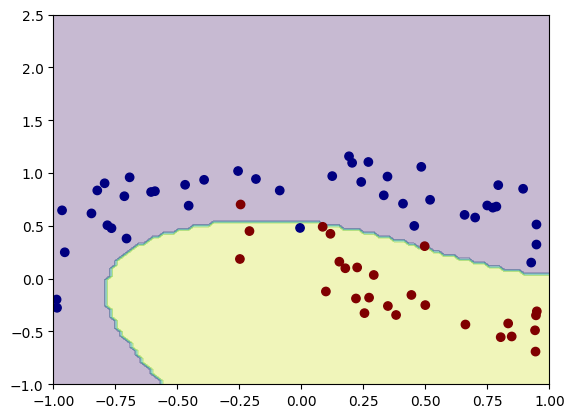

In [12]:
plt.contourf(x1_new_grid , x2_new_grid , y_pred_grid , alpha=0.3) 
plt.scatter(x[: , 0] , x[: , 1] , c=y , cmap='jet')
plt.axis([-1 , 1 , -1 , 2.5])
plt.show()

In [13]:
final_points[2]

array([-0.95959596, -1.        ])

In [14]:
x[0]

array([ 0.34896077, -0.25879144])

In [15]:
#damm i actually did something

In [16]:
#polynomial kernel trick where we dont have to create hella new features so it saves computaion 

In [17]:
# it does same work as if we were to create polynomial features but it does not create new features hence saves from the computaion 

In [19]:
from sklearn.svm import SVC

In [51]:
poly_kernle_svm_clf = Pipeline([
    ("scaler" , StandardScaler()),
    ("svm_clf" , SVC(kernel = "poly" , degree = 10 , coef0= 1 , C= 5))
])

In [52]:
poly_kernle_svm_clf.fit(x,y)

,steps,"[('scaler', ...), ('svm_clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,5
,kernel,'poly'
,degree,10
,gamma,'scale'


In [43]:
#ima create a function for contour plot 

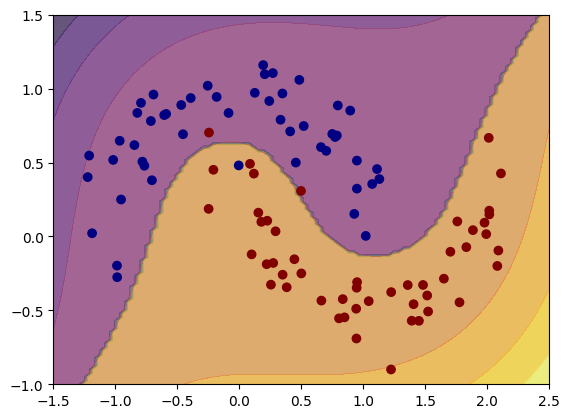

In [44]:
def contour_plot(poly_kernle_svm_clf, axes):
    x1 = np.linspace(axes[0] , axes[1] , 100)
    x2 = np.linspace(axes[2] , axes[3] , 100)
    x1_meshgrid , x2_meshgrid = np.meshgrid(x1 , x2)
    x_final_points = np.c_[x1_meshgrid.ravel() , x2_meshgrid.ravel()]
    y_pred = poly_kernle_svm_clf.predict(x_final_points).reshape(x1_meshgrid.shape)
    decision_boundary = poly_kernle_svm_clf.decision_function(x_final_points).reshape(x1_meshgrid.shape)
    plt.contourf(x1_meshgrid , x2_meshgrid , y_pred , alpha = 0.5)
    plt.contourf(x1_meshgrid , x2_meshgrid , decision_boundary , cmap = "inferno" , alpha = 0.4)
    
    
def plot_points(x , y , axes):
    x1 , x2  = x[: , 0] , x[: , 1]
    plt.scatter(x1 , x2 , c=y , cmap="jet")
    plt.axis(axes)
    
    

contour_plot(poly_kernle_svm_clf , [-1.5 , 2.5 , -1 , 1.5])
plot_points(x , y ,[-1.5 , 2.5 , -1 , 1.5] )    
    

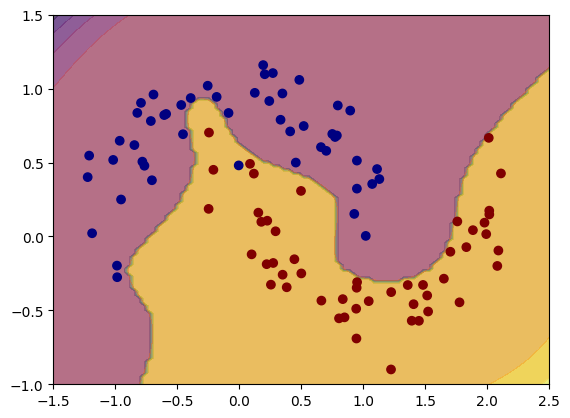

In [53]:
contour_plot(poly_kernle_svm_clf , [-1.5 , 2.5 , -1 , 1.5])
plot_points(x , y ,[-1.5 , 2.5 , -1 , 1.5] ) 